# PyPSA-USA Tutorial

In [19]:
import pypsa
import os

In [20]:
# Wildcards:
num_clusters = 20
interconnect = "texas"
opts = "Ep"
ll = "v1.0"
sector = "E"

run_name = "Tutorial"


resources_folder = os.path.join(
    os.path.dirname(os.getcwd()), "../", "resources", run_name
)
results_folder = os.path.join(os.path.dirname(os.getcwd()), "../", "results", run_name)


n_base_network = pypsa.Network(
    os.path.join(resources_folder, f"{interconnect}/elec_base_network.nc")
)
network_elec = pypsa.Network(
    os.path.join(resources_folder, f"{interconnect}/elec_base_network_l_pp.nc")
)
network_s = pypsa.Network(os.path.join(resources_folder, f"{interconnect}/elec_s.nc"))
network_c = pypsa.Network(
    os.path.join(resources_folder, f"{interconnect}/elec_s_{num_clusters}.nc")
)
network_c_ec = pypsa.Network(
    os.path.join(resources_folder, f"{interconnect}/elec_s_{num_clusters}_ec.nc")
)
# network_presolve = pypsa.Network(
#     os.path.join(
#         resources_folder,
#         f"{interconnect}/elec_s_{num_clusters}_ec_l{ll}_{opts}_{sector}.nc",
#     )
# )
# network_solved = pypsa.Network(
#     os.path.join(
#         results_folder,
#         f"{interconnect}/networks/elec_s_{num_clusters}_ec_l{ll}_{opts}_{sector}.nc",
#     )
# )

INFO:pypsa.io:Imported network elec_base_network.nc has buses, lines, line_types, transformers
INFO:pypsa.io:Imported network elec_base_network_l_pp.nc has buses, carriers, generators, lines, line_types, loads, storage_units, transformers
INFO:pypsa.io:Imported network elec_s.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_20.nc has buses, carriers, generators, lines, loads, storage_units
INFO:pypsa.io:Imported network elec_s_20_ec.nc has buses, carriers, generators, lines, loads, storage_units


### Base Network
Reads in Breakthrough Energy/TAMU transmission dataset, and converts it into PyPSA compatible components. A base netowork file (`*.nc`) is written out. Included in this network are: Bus-Region memberships, Geolocated buses, Geoloactated AC and DC transmission lines + links, Transformers

In [12]:
n_base_network.investment_periods

Index([], dtype='int64', name='name')

### Add Electricity
This module integrates data produced by `build_renewable_profiles`, `build_demand`, `build_cost_data`, `build_fuel_prices`, and `build_base_network` to create a network model that includes generators, demand, and costs. The module attaches generators, storage units, and loads to the network created by `build_base_network`. Each generator is assigned regional capital costs, and regional and daily or monthly marginal costs.

In [14]:
network_elec.investment_periods

Index([2030, 2040, 2050], dtype='int64', name='name')

In [6]:
network_elec.generators

,carrier,bus,p_nom_min,p_nom,p_nom_extendable,efficiency,marginal_cost,capital_cost,build_year,p_nom_max,...,stand_by_cost,min_up_time,min_down_time,up_time_before,down_time_before,ramp_limit_up,ramp_limit_down,ramp_limit_start_up,ramp_limit_shut_down,p_nom_opt
Generator,,,,,,,,,,,,,,,,,,,,,
C536_298_1,coal,3008067,893.0,893.0,True,0.395,17.249900,56882.962205,1985,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
C537_298_2,coal,3008067,956.8,956.8,True,0.395,17.249900,56882.962205,1986,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
C5119_3439_4,OCGT,3004113,131.8,131.8,True,0.293,66.479092,18145.314984,2008,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
C5120_3439_5,OCGT,3004113,131.8,131.8,True,0.470,43.812757,18145.314984,2008,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
C5121_3441_7,CCGT,3004161,351.0,351.0,True,0.531,34.959650,20093.947279,1972,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13206,hydro,3006274,0.0,0.0,False,0.900,0.000000,42654.341396,0,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
13461,hydro,3002063,80.0,80.0,False,0.900,0.000000,42654.341396,0,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0
13462,hydro,3003050,75.8,75.8,False,0.900,0.000000,42654.341396,0,inf,...,0.0,0,0,1,0,NaN,NaN,1.0,1.0,0.0


### Simplified Network
Aggregates network to substations and simplifies to a single voltage level, and trims spur line-ends.

In [18]:
network_s.loads_t.p_set

Load                        39762 AC  39763 AC  39766 AC  39769 AC  39770 AC  \
period timestep                                                                
2030   2019-01-01 00:00:00   15.0484   11.1596    5.0765    2.1653   21.1677   
       2019-01-01 01:00:00   15.0180   11.1370    5.0662    2.1609   21.1249   
       2019-01-01 02:00:00   14.7893   10.9674    4.9891    2.1280   20.8032   
       2019-01-01 03:00:00   14.4172   10.6915    4.8635    2.0745   20.2798   
       2019-01-01 04:00:00   13.7838   10.2218    4.6499    1.9833   19.3889   
...                              ...       ...       ...       ...       ...   
2050   2019-01-31 19:00:00   14.8386   11.0040    5.0057    2.1351   20.8726   
       2019-01-31 20:00:00   14.8053   10.9793    4.9945    2.1303   20.8257   
       2019-01-31 21:00:00   14.7802   10.9606    4.9860    2.1267   20.7904   
       2019-01-31 22:00:00   14.7906   10.9684    4.9895    2.1282   20.8050   
       2019-01-31 23:00:00   14.9683   11.1002    5.0495    2.1538   21.0550   

Load                        39771 AC  39772 AC  39773 AC  39774 AC  39775 AC  \
period timestep                                                                
2030   2019-01-01 00:00:00    1.6077    5.4386    2.0929   13.2814    0.0507   
       2019-01-01 01:00:00    1.6044    5.4276    2.0886   13.2546    0.0506   
       2019-01-01 02:00:00    1.5800    5.3449    2.0568   13.0527    0.0498   
       2019-01-01 03:00:00    1.5402    5.2104    2.0051   12.7243    0.0486   
       2019-01-01 04:00:00    1.4726    4.9816    1.9170   12.1653    0.0464   
...                              ...       ...       ...       ...       ...   
2050   2019-01-31 19:00:00    1.5853    5.3627    2.0637   13.0962    0.0500   
       2019-01-31 20:00:00    1.5817    5.3507    2.0591   13.0668    0.0499   
       2019-01-31 21:00:00    1.5790    5.3416    2.0556   13.0447    0.0498   
       2019-01-31 22:00:00    1.5801    5.3454    2.0570   13.0539    0.0498   
       2019-01-31 23:00:00    1.5991    5.4096    2.0817   13.2107    0.0504   

Load                        ...  41000 AC  41001 AC  41002 AC  41003 AC  \
period timestep             ...                                           
2030   2019-01-01 00:00:00  ...   16.6126    4.3740    4.4609   36.1437   
       2019-01-01 01:00:00  ...   16.5791    4.3652    4.4519   36.0707   
       2019-01-01 02:00:00  ...   16.3266    4.2987    4.3841   35.5213   
       2019-01-01 03:00:00  ...   15.9158    4.1906    4.2738   34.6276   
       2019-01-01 04:00:00  ...   15.2166    4.0065    4.0861   33.1064   
...                         ...       ...       ...       ...       ...   
2050   2019-01-31 19:00:00  ...   16.3810    4.3130    4.3987   35.6398   
       2019-01-31 20:00:00  ...   16.3442    4.3034    4.3889   35.5597   
       2019-01-31 21:00:00  ...   16.3165    4.2961    4.3814   35.4994   
       2019-01-31 22:00:00  ...   16.3280    4.2991    4.3845   35.5244   
       2019-01-31 23:00:00  ...   16.5242    4.3508    4.4372   35.9513   

Load                        41005 AC  41006 AC  41007 AC  41008 AC  41009 AC  \
period timestep                                                                
2030   2019-01-01 00:00:00    6.1627   12.5862   33.5656   27.9170   19.0531   
       2019-01-01 01:00:00    6.1503   12.5608   33.4978   27.8606   19.0146   
       2019-01-01 02:00:00    6.0566   12.3695   32.9876   27.4363   18.7250   
       2019-01-01 03:00:00    5.9042   12.0582   32.1576   26.7460   18.2539   
       2019-01-01 04:00:00    5.6449   11.5285   30.7450   25.5711   17.4520   
...                              ...       ...       ...       ...       ...   
2050   2019-01-31 19:00:00    6.0768   12.4107   33.0977   27.5278   18.7875   
       2019-01-31 20:00:00    6.0632   12.3828   33.0233   27.4660   18.7452   
       2019-01-31 21:00:00    6.0529   12.3618   32.9673   27.4194   18.7135   
       2019-01-31 22:00:00    6.0572   12.3706   32.9905   27.

### Cluster Network
Creates networks clustered to ``{cluster}`` number of zones with aggregated
buses, generators and transmission corridors.

In [8]:
network_c

PyPSA Network
Components:
 - Bus: 20
 - Carrier: 14
 - Generator: 136
 - Line: 46
 - Load: 20
 - StorageUnit: 13
Snapshots: 2232

/var/folders/00/vqry7y9s78q3rvf_m_jmk_bc0000gn/T/ipykernel_8812/2869378948.py:1: FutureWarning:

DataFrame.groupby with axis=1 is deprecated. Do `frame.T.groupby(...)` without axis instead.



<Axes: xlabel='period,timestep'>

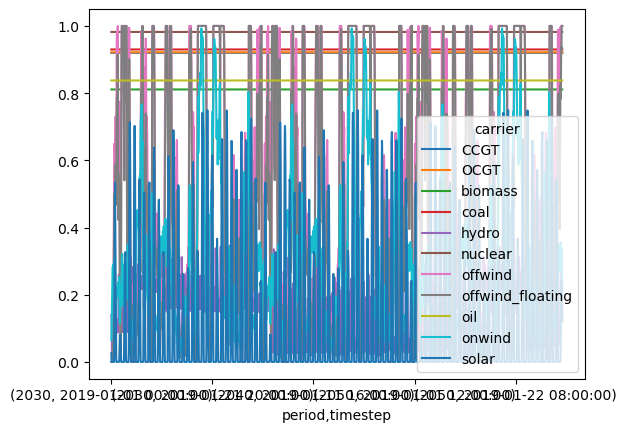

In [9]:
network_c.generators_t.p_max_pu.groupby(
    network_c.generators.carrier, axis=1
).mean().plot()

### Add Extra Components
Adds extendible components like battery energy storage, extendable conventional plants, and hydrogen infrastructure to the simplified network.


In [10]:
network_c_ec

PyPSA Network
Components:
 - Bus: 20
 - Carrier: 15
 - Generator: 199
 - Line: 46
 - Load: 20
 - StorageUnit: 33
Snapshots: 2232

In [11]:
network_c_ec.investment_periods

Index([], dtype='int64', name='name')

### Prepare Network
Prepare PyPSA network for solving according to `opts` and `ll`, such
as.
- adding an annual **limit** of carbon-dioxide emissions,
- adding an exogenous **price** per tonne emissions of carbon-dioxide (or other kinds),
- setting an **N-1 security margin** factor for transmission line capacities,
- specifying an expansion limit on the **cost** of transmission expansion,
- specifying an expansion limit on the **volume** of transmission expansion, and
- reducing the **temporal** resolution by averaging over multiple hours
  or segmenting time series into chunks of varying lengths using ``tsam``.

In [ ]:
network_presolve.global_constraints

In [ ]:
network_presolve.optimize(solver_name="gurobi")

In [ ]:
network_presolve.lines_t.p0.plot(legend=False)

In [ ]:
network_presolve.generators_t.p

### Solve Network

In [ ]:
network_solved